In [2]:
import scanpy as sc
import scvelo as scv
import os
from anndata import AnnData as ad
import pandas as pd
import numpy as np
from celldreamer.paths import DATA_DIR

Read dataset 

In [3]:
# adata = scv.datasets.dentategyrus_lamanno("../../project_folder/datasets/raw/dentategyrus.loom")

Save counts 

In [4]:
# adata.layers["X_counts"] = adata.X.copy()

In [5]:
# adata.write_h5ad("../../project_folder/datasets/raw/dentategyrus.h5ad")

In [6]:
adata = sc.read_h5ad("../../project_folder/datasets/raw/dentategyrus.h5ad")

In [7]:
adata.layers["X_counts"] = adata.X.copy()

In [8]:
sc.pp.filter_genes(adata, min_cells=5)

HVG selection

Preprocess

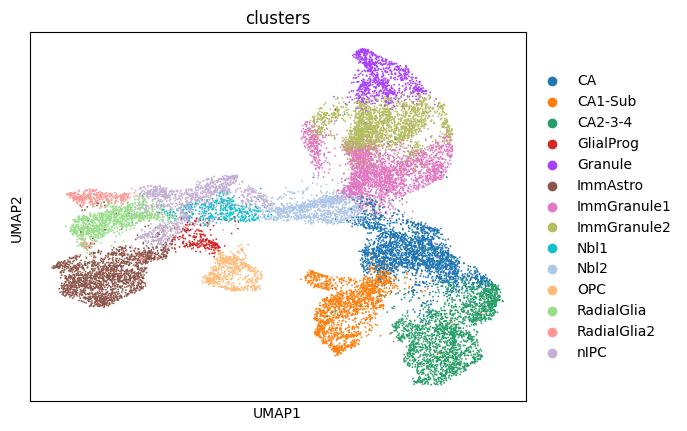

In [24]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["clusters"])

In [13]:
adata.obs = adata.obs.rename({"clusters": "cell_type"})

## Train test split

In [27]:
# Generate random indices for train and test sets
total_samples = adata.n_obs
train_frac = 0.8
train_size = int(total_samples * train_frac)
train_indices = np.random.choice(total_samples, size=train_size, replace=False)
test_indices = np.setdiff1d(np.arange(total_samples), train_indices)

# Separate data into train and test sets by indexing the Anndata object
train_adata = adata[train_indices, :]
test_adata = adata[test_indices, :]

In [28]:
train_adata

View of AnnData object with n_obs × n_vars = 14570 × 17002
    obs: 'Age', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    uns: 'clusters_colors', 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_tsne', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'X_counts'
    obsp: 'distances', 'connectivities'

In [29]:
test_adata

View of AnnData object with n_obs × n_vars = 3643 × 17002
    obs: 'Age', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    uns: 'clusters_colors', 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_tsne', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'X_counts'
    obsp: 'distances', 'connectivities'

In [30]:
adata

AnnData object with n_obs × n_vars = 18213 × 17002
    obs: 'Age', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    uns: 'clusters_colors', 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_tsne', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'X_counts'
    obsp: 'distances', 'connectivities'

## Save

In [43]:
sc.AnnData.write_h5ad(adata, DATA_DIR / "processed_full_genome" / "dentategyrus" / "dentategyrus.h5ad")

In [44]:
sc.AnnData.write_h5ad(train_adata, DATA_DIR / "processed_full_genome" / "dentategyrus" / "dentategyrus_train.h5ad")

In [45]:
sc.AnnData.write_h5ad(test_adata, DATA_DIR / "processed_full_genome" / "dentategyrus" / "dentategyrus_test.h5ad")

## Run highly variable gene selection

In [2]:
adata = sc.read_h5ad(DATA_DIR / "processed_full_genome" / "dentategyrus" / "dentategyrus.h5ad")
train_adata = sc.read_h5ad(DATA_DIR / "processed_full_genome" / "dentategyrus" / "dentategyrus_train.h5ad")
test_adata = sc.read_h5ad(DATA_DIR / "processed_full_genome" / "dentategyrus" / "dentategyrus_test.h5ad")

In [3]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="X_counts",
    subset=False,
)

In [4]:
train_adata.var = adata.var
test_adata.var = adata.var

In [5]:
sc.AnnData.write_h5ad(adata, DATA_DIR / "processed_full_genome" / "dentategyrus" / "dentategyrus.h5ad")
sc.AnnData.write_h5ad(test_adata, DATA_DIR / "processed_full_genome" / "dentategyrus" / "dentategyrus_test.h5ad")
sc.AnnData.write_h5ad(train_adata, DATA_DIR / "processed_full_genome" / "dentategyrus" / "dentategyrus_train.h5ad")

In [9]:
train_adata

AnnData object with n_obs × n_vars = 14570 × 17002
    obs: 'Age', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'clusters_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'X_counts', 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'